<a href="https://colab.research.google.com/github/Siuumanth/Machine-Learning-and-other-notebooks/blob/main/CNNTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Guided Projects in Code Basics




In [ ]:
!pip install paddleOCR

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 22.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=2f55f94028188393a40ea4aec2979d1aa5ed16707315e5b0a0d3000a20b7685d
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


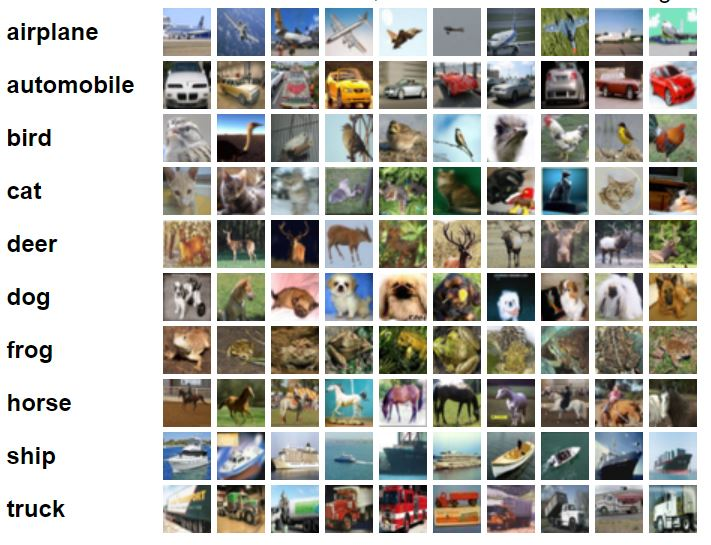

basicallyy labels are 0 to 10

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
print(X_train.shape)

170498071/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Here we see there are 50000 training images and 1000 test images

In [ ]:
plt.imshow(X_train[0]) #frog

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
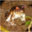

In [ ]:
X_train[0]

In [ ]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train=y_train.reshape(50000)
print(y_train.shape)

(50000,)


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

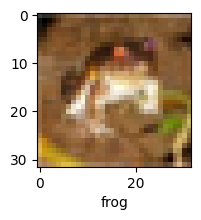

In [ ]:
plot_sample(X_train,y_train,0)

normalisation of rgb 255 values

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

first we create ann and commpare with cnn

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 153s 97ms/step - loss: 1.8119 - accuracy: 0.3537
Epoch 2/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.6241 - accuracy: 0.4256
Epoch 3/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.5411 - accuracy: 0.4556
Epoch 4/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.4806 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4305 - accuracy: 0.4977


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.66      0.54      1000
           1       0.74      0.43      0.54      1000
           2       0.51      0.13      0.20      1000
           3       0.33      0.38      0.35      1000
           4       0.37      0.47      0.41      1000
           5       0.34      0.45      0.39      1000
           6       0.48      0.62      0.54      1000
           7       0.54      0.55      0.54      1000
           8       0.56      0.62      0.59      1000
           9       0.66      0.39      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



Now let us build a convolutional neural network to train our images

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),    #kernel is window size
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4436 - accuracy: 0.4801
Epoch 2/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0949 - accuracy: 0.6175
Epoch 3/5
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9668 - accuracy: 0.6622
Epoch 4/5
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8786 - accuracy: 0.6939
Epoch 5/5
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8097 - accuracy: 0.7191


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.9095 - accuracy: 0.6899


[0.9094604253768921, 0.6898999810218811]